## Homework 4

### Part 1

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [loc, scale]
>Metropolis: [df]


Sampling 4 chains for 2_000 tune and 3_000 draw iterations (8_000 + 12_000 draws total) took 7 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details


Effective sample size for df parameter: 867.16


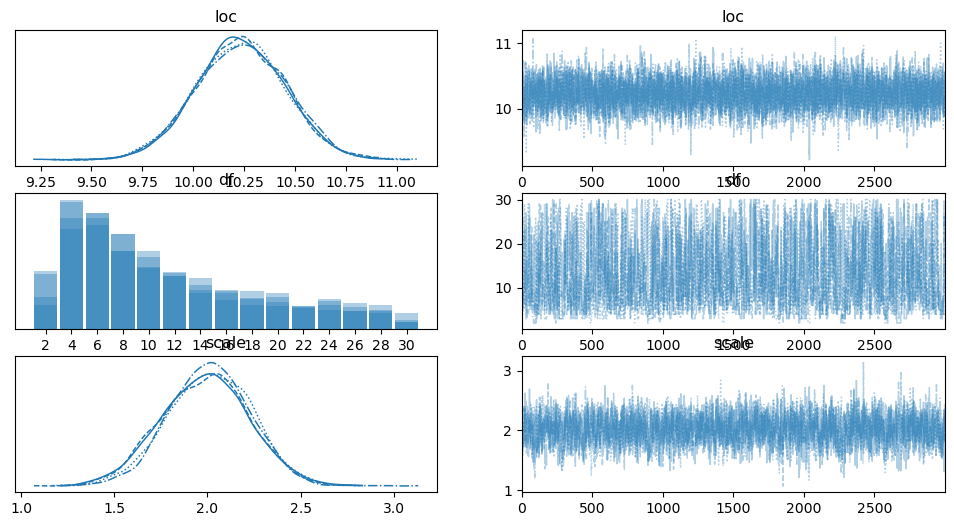

In [10]:
import pymc as pm
import arviz as az
import numpy as np

mu_0, sigma_0 = 0, 10
samples, loc_T, scale_T, degree_freedomf_T = 100, 10, 2, 15
x = np.random.standard_t(df=degree_freedomf_T, size=samples) * scale_T + loc_T

with pm.Model() as model:
    loc = pm.Normal('loc', mu=mu_0, sigma=sigma_0)
    scale = pm.HalfNormal('scale', sigma=5)
    df = pm.DiscreteUniform('df', lower=1, upper=30)
    
    pm.StudentT('x_obs', mu=loc, sigma=scale, nu=df, observed=x)
    
    trace = pm.sample(draws=3000, tune=2000, target_accept=0.95, return_inferencedata=True)

az.plot_trace(trace)
az.summary(trace, round_to=2)

df_summary = az.summary(trace, var_names=['df'], round_to=2)
df_ess = df_summary['ess_bulk'].values[0]
print(f"Effective sample size for df parameter: {df_ess}")

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [loc, scale]
>Metropolis: [df]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 2 seconds.


array([[<Axes: title={'center': 'loc'}>, <Axes: title={'center': 'loc'}>],
       [<Axes: title={'center': 'df'}>, <Axes: title={'center': 'df'}>],
       [<Axes: title={'center': 'scale'}>,
        <Axes: title={'center': 'scale'}>]], dtype=object)

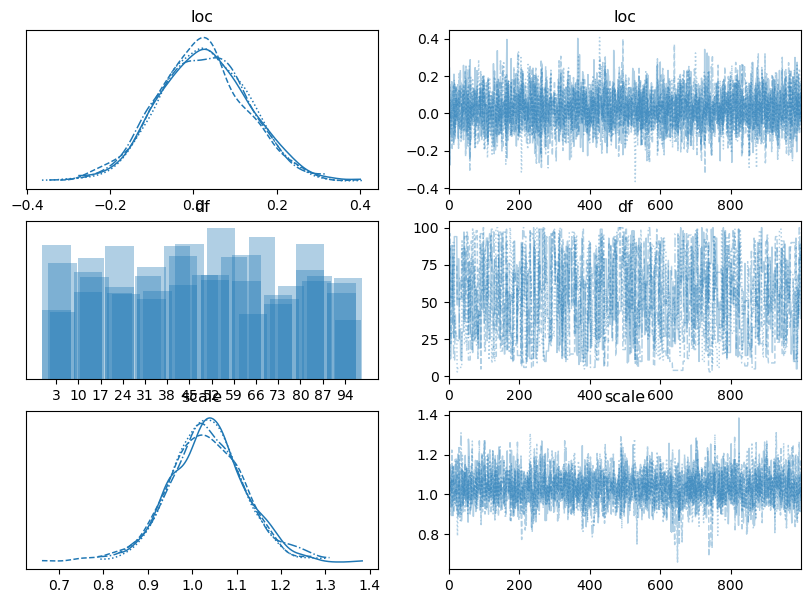

In [6]:
import numpy as np
import scipy.stats as stats
import pymc as pm
import arviz as az

n, loc_T, scale_T, degree_freedom_T = 100, 0, 1, 30
x = stats.t(df=degree_freedom_T, loc=loc_T, scale=scale_T).rvs(n)

with pm.Model() as model:
    loc = pm.Normal("loc", mu=0, sigma=10)
    scale = pm.HalfNormal("scale", sigma=5)
    df = pm.DiscreteUniform("df", lower=1, upper=100)
    x_obs = pm.StudentT("likelihood", mu=loc, sigma=scale, nu=df, observed=x)
    idata = pm.sample(return_inferencedata=True)
az.plot_trace(idata, figsize=(10, 7))

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [loc, scale]
>Metropolis: [df]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 5 seconds.
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


array([[<Axes: title={'center': 'loc'}>, <Axes: title={'center': 'loc'}>],
       [<Axes: title={'center': 'df'}>, <Axes: title={'center': 'df'}>],
       [<Axes: title={'center': 'scale'}>,
        <Axes: title={'center': 'scale'}>]], dtype=object)

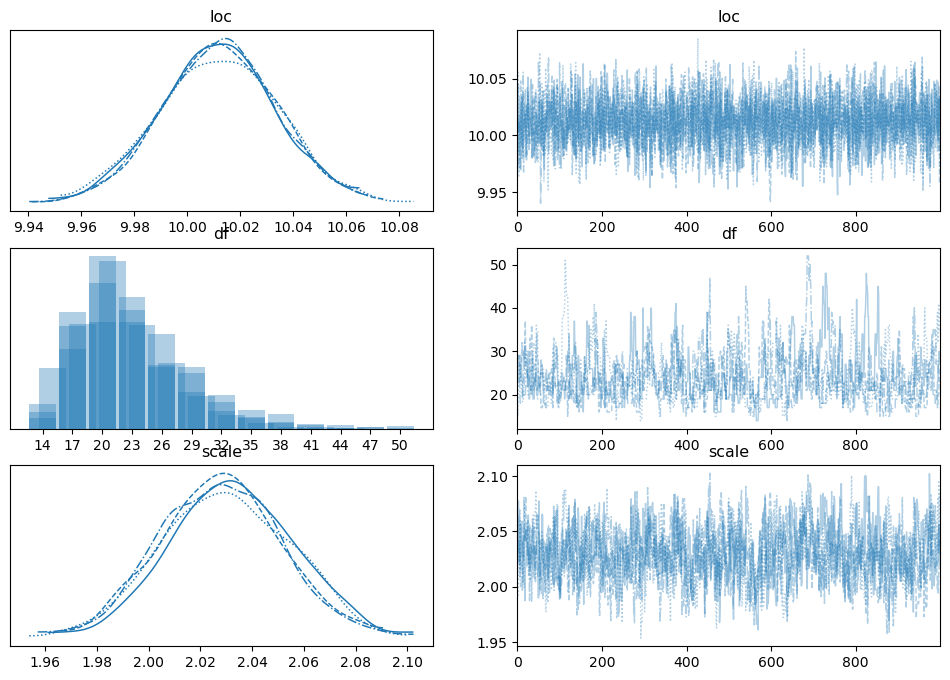

In [7]:
import numpy as np
import scipy.stats as stats
import pymc as pm
import arviz as az

n, loc_T, scale_T, degree_freedom_T = 10000, 10, 2, 15
x = stats.t(df=degree_freedom_T, loc=loc_T, scale=scale_T).rvs(n)

with pm.Model() as model:
    loc = pm.Normal("loc", mu=0, sigma=10)
    scale = pm.HalfNormal("scale", sigma=5)
    df = pm.DiscreteUniform("df", lower=1, upper=100)
    
    x_obs = pm.StudentT("x_obs", mu=loc, sigma=scale, nu=df, observed=x)
    
    trace = pm.sample(1000, return_inferencedata=True)

az.plot_trace(trace, figsize=(12, 8))

### Part 2

In [8]:
import pymc as pm
import numpy as np

J = 8
y = np.array([28.0, 8.0, -3.0, 7.0, -1.0, 1.0, 18.0, 12.0])
sigma = np.array([15.0, 10.0, 16.0, 11.0, 9.0, 11.0, 10.0, 18.0])

def create_model(centered=True):
    with pm.Model() as model:
        mu = pm.Normal("mu", mu=0, sigma=5)
        tau = pm.HalfCauchy("tau", beta=5)
        if centered:
            theta = pm.Normal("theta", mu=mu, sigma=tau, shape=J)
        else:
            theta_tilde = pm.Normal("theta_t", mu=0, sigma=1, shape=J)
            theta = pm.Deterministic("theta", mu + tau * theta_tilde)
        obs = pm.Normal("obs", mu=theta, sigma=sigma, observed=y)
    return model

SEED = [365, 366]

centered_eight = create_model(centered=True)
with centered_eight:
    fit_centered = pm.sample(5000, chains=2, tune=1000, random_seed=SEED,
                        return_inferencedata=True, idata_kwargs={"log_likelihood": True})

# Non-centered model
Non_centered_eight = create_model(centered=False)
with Non_centered_eight:
    fit_Non_centered = pm.sample(5000, chains=2, tune=1000, random_seed=SEED,
                         return_inferencedata=True, idata_kwargs={"log_likelihood": True})

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [mu, tau, theta]


Sampling 2 chains for 1_000 tune and 5_000 draw iterations (2_000 + 10_000 draws total) took 11 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [mu, tau, theta_t]


Sampling 2 chains for 1_000 tune and 5_000 draw iterations (2_000 + 10_000 draws total) took 6 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


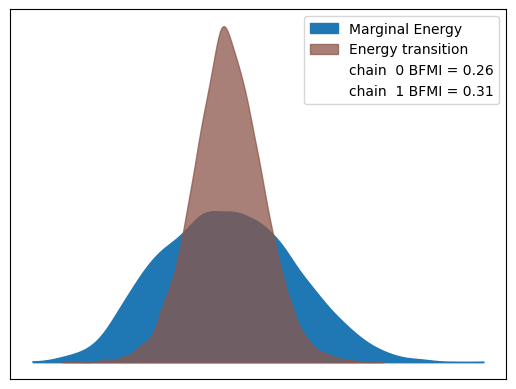

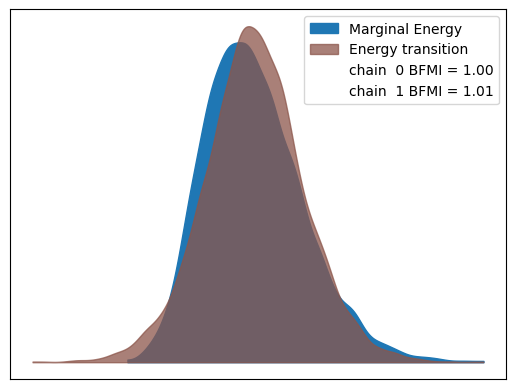

In [9]:
import arviz as az
az.plot_energy(fit_centered);
az.plot_energy(fit_Non_centered);